In [186]:
from statsmodels.tsa.arima.model import ARIMA
import pickle
import pandas as pd
import numpy as np
from pmdarima.arima import ARIMA
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.metrics import make_scorer
from sklearn.model_selection import *

In [28]:
data = pickle.load(open(r'../Data/deltaQ100-10.pkl', 'rb'))

In [245]:
Y = []
for elt in data.values():
    y = elt['cycle_life']
    Y.append(y)

In [270]:
X = []
for elt in data.values():
    times = elt['DeltaQ']
    
    # training ARIMA

    TEST_SIZE = 10
    train, test = times[:-TEST_SIZE], times[-TEST_SIZE:]
    x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], times.shape[0]))

    model = ARIMA(order = (5, 0, 0),maxiter=100)
    
    model.fit(train)

    X.append(model.params())
print(X)


/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nathansun/opt/anaconda3/lib/p

/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nat

[array([-3.66616085e-06,  4.10649917e+00, -6.76715695e+00,  5.64067890e+00,
       -2.40911381e+00,  4.29086024e-01,  3.84380747e-11]), array([-4.80203902e-06,  4.18769012e+00, -7.03626650e+00,  5.94222035e+00,
       -2.53068657e+00,  4.37016378e-01,  2.61302821e-11]), array([-4.69479093e-06,  4.31198045e+00, -7.46784456e+00,  6.50688723e+00,
       -2.86045804e+00,  5.09427587e-01,  3.62641325e-11]), array([-3.39859680e-06,  4.24543532e+00, -7.20433261e+00,  6.11401583e+00,
       -2.59989309e+00,  4.44768429e-01,  4.20036825e-11]), array([-4.53180411e-06,  4.17125770e+00, -6.98473801e+00,  5.89029640e+00,
       -2.51360948e+00,  4.36776168e-01,  2.63782864e-11]), array([-3.25806663e-09,  4.28288284e+00, -7.35299714e+00,  6.33577107e+00,
       -2.74583435e+00,  4.80177555e-01,  9.99922924e-11]), array([-3.35544582e-06,  4.20917491e+00, -7.09249211e+00,  5.98989400e+00,
       -2.54128282e+00,  4.34701068e-01,  4.64490833e-11]), array([-3.75676525e-06,  4.21695945e+00, -7.17566920e+

/Users/nathansun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


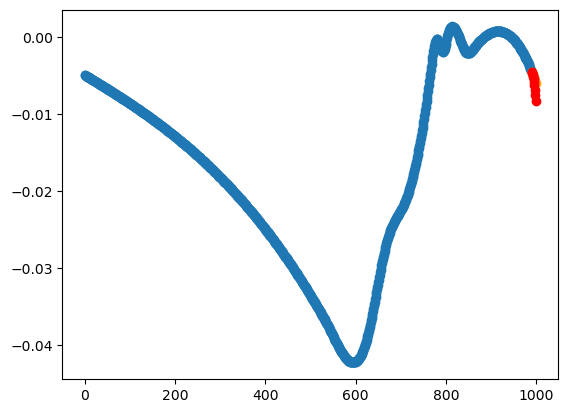

In [269]:
elt = list(data.values())[70]
y = elt['cycle_life']
times = elt['DeltaQ']

# training ARIMA

TEST_SIZE = 10
train, test = times[:-TEST_SIZE], times[-TEST_SIZE:]
X_train, X_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], times.shape[0]))

model = ARIMA(order = (5, 0, 0),maxiter=100)

model.fit(train)

model.summary()

prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)
plt.scatter(X_train, train)
plt.scatter(X_test,test, color='orange')
plt.scatter(X_test, prediction, color = 'red')

In [261]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  990
Model:               SARIMAX(1, 1, 1)   Log Likelihood               10136.582
Date:                Fri, 30 Jun 2023   AIC                         -20265.164
Time:                        11:46:39   BIC                         -20245.577
Sample:                             0   HQIC                        -20257.716
                                - 990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.103e-07   3.95e-07     -0.279      0.780   -8.84e-07    6.64e-07
ar.L1          0.9984      0.002    535.640      0.000       0.995       1.002
ma.L1               0   2.43e-05          0      1.0

In [271]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

In [272]:
X = np.array(X)
Y = np.array(Y)
x_train = X[train_ind]
y_train = Y[train_ind]

x_test = X[test_ind]
y_test = Y[test_ind]

x_stest = X[secondary_ind]
y_stest = Y[secondary_ind]
# regressor.fit(x_train.reshape(-1, 1),y_train)

In [274]:
# Create the random grid
def loss(ground_truth, predictions):
    diff = np.sqrt(np.mean((10**ground_truth - 10**predictions)**2))
    return diff

my_scorer = make_scorer(loss, greater_is_better=False)

regressor = SVR()

param_grid = {'C': np.logspace(-3, 4, base=10, num=1000), 
              'kernel': ['linear','rbf'],
              'gamma': np.logspace(-5, 1, base=10, num=50),
              'epsilon': np.logspace(-5, 0, base=10, num=50)} 
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 5000, cv=folds, param_distributions = param_grid ,scoring="neg_mean_squared_error", random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=5000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-03, 1.01626509e-03, 1.03279473e-03, 1.04959323e-03,
       1.06666496e-03, 1.08401436e-03, 1.10164595e-03, 1.11956432e-03,
       1.13777413e-03, 1.15628013e-03, 1.17508713e-03, 1.19420003e-03,
       1.21362380e-03, 1.23336350e-03, 1...
       8.28642773e-02, 1.09854114e-01, 1.45634848e-01, 1.93069773e-01,
       2.55954792e-01, 3.39322177e-01, 4.49843267e-01, 5.96362332e-01,
       7.90604321e-01, 1.04811313e+00, 1.38949549e+00, 1.84206997e+00,
       2.44205309e+00, 3.23745754e+00, 4.29193426e+00, 5.68986603e+00,
       7.54312006e+00, 1.00000000e+01]),
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)
Fitting 4 folds for each of 5000 candidates, t

[CV] END C=22.82224474186896, epsilon=0.005689866029018299, gamma=0.020235896477251575, kernel=linear; total time=   0.0s
[CV] END C=22.82224474186896, epsilon=0.005689866029018299, gamma=0.020235896477251575, kernel=linear; total time=   0.0s
[CV] END C=0.0858882855954625, epsilon=0.19306977288832497, gamma=0.01151395399326447, kernel=linear; total time=   0.0s
[CV] END C=0.0858882855954625, epsilon=0.19306977288832497, gamma=0.01151395399326447, kernel=linear; total time=   0.0s
[CV] END C=0.0858882855954625, epsilon=0.19306977288832497, gamma=0.01151395399326447, kernel=linear; total time=   0.0s
[CV] END C=0.0858882855954625, epsilon=0.19306977288832497, gamma=0.01151395399326447, kernel=linear; total time=   0.0s
[CV] END C=437.1602248248502, epsilon=5.1794746792312125e-05, gamma=9.540954763499944e-05, kernel=rbf; total time=   0.0s
[CV] END C=437.1602248248502, epsilon=5.1794746792312125e-05, gamma=9.540954763499944e-05, kernel=rbf; total time=   0.0s
[CV] END C=437.1602248248502

[CV] END C=1150.962200885031, epsilon=0.0071968567300115215, gamma=0.00012648552168552957, kernel=rbf; total time=   0.0s
[CV] END C=273.80251779278575, epsilon=8.286427728546843e-05, gamma=4.291934260128778, kernel=rbf; total time=   0.0s
[CV] END C=273.80251779278575, epsilon=8.286427728546843e-05, gamma=4.291934260128778, kernel=rbf; total time=   0.0s
[CV] END C=4252.346334528677, epsilon=0.000339322177189533, gamma=1.3257113655901082e-05, kernel=linear; total time=   0.0s
[CV] END C=4252.346334528677, epsilon=0.000339322177189533, gamma=1.3257113655901082e-05, kernel=linear; total time=   0.0s
[CV] END C=4252.346334528677, epsilon=0.000339322177189533, gamma=1.3257113655901082e-05, kernel=linear; total time=   0.0s
[CV] END C=4252.346334528677, epsilon=0.000339322177189533, gamma=1.3257113655901082e-05, kernel=linear; total time=   0.0s
[CV] END C=3.9318287557057703, epsilon=0.014563484775012445, gamma=1.3257113655901082e-05, kernel=rbf; total time=   0.0s
[CV] END C=3.93182875570

[CV] END C=0.002314005380130654, epsilon=1.2648552168552958e-05, gamma=9.540954763499944e-05, kernel=linear; total time=   0.0s
[CV] END C=182.92045048462938, epsilon=0.009102981779915217, gamma=0.33932217718953295, kernel=linear; total time=   0.0s
[CV] END C=182.92045048462938, epsilon=0.009102981779915217, gamma=0.33932217718953295, kernel=linear; total time=   0.0s
[CV] END C=182.92045048462938, epsilon=0.009102981779915217, gamma=0.33932217718953295, kernel=linear; total time=   0.0s
[CV] END C=0.0036354699612933176, epsilon=0.011513953993264481, gamma=0.7906043210907702, kernel=rbf; total time=   0.0s
[CV] END C=0.0036354699612933176, epsilon=0.011513953993264481, gamma=0.7906043210907702, kernel=rbf; total time=   0.0s
[CV] END C=0.0036354699612933176, epsilon=0.011513953993264481, gamma=0.7906043210907702, kernel=rbf; total time=   0.0s
[CV] END C=0.0036354699612933176, epsilon=0.011513953993264481, gamma=0.7906043210907702, kernel=rbf; total time=   0.0s
[CV] END C=2.271728133

[CV] END C=7601.177617955323, epsilon=0.001757510624854793, gamma=9.540954763499944e-05, kernel=linear; total time=   0.0s
[CV] END C=7601.177617955323, epsilon=0.001757510624854793, gamma=9.540954763499944e-05, kernel=linear; total time=   0.0s
[CV] END C=7601.177617955323, epsilon=0.001757510624854793, gamma=9.540954763499944e-05, kernel=linear; total time=   0.0s
[CV] END C=7601.177617955323, epsilon=0.001757510624854793, gamma=9.540954763499944e-05, kernel=linear; total time=   0.0s
[CV] END C=0.012192312516491107, epsilon=2.559547922699533e-05, gamma=0.0012067926406393288, kernel=rbf; total time=   0.0s
[CV] END C=0.012192312516491107, epsilon=2.559547922699533e-05, gamma=0.0012067926406393288, kernel=rbf; total time=   0.0s
[CV] END C=0.012192312516491107, epsilon=2.559547922699533e-05, gamma=0.0012067926406393288, kernel=rbf; total time=   0.0s
[CV] END C=0.012192312516491107, epsilon=2.559547922699533e-05, gamma=0.0012067926406393288, kernel=rbf; total time=   0.0s
[CV] END C=1

[CV] END C=0.019466563433422623, epsilon=0.014563484775012445, gamma=0.04714866363457394, kernel=linear; total time=   0.0s
[CV] END C=0.3913745601980384, epsilon=0.00021209508879201905, gamma=9.540954763499944e-05, kernel=rbf; total time=   0.0s
[CV] END C=0.3913745601980384, epsilon=0.00021209508879201905, gamma=9.540954763499944e-05, kernel=rbf; total time=   0.0s
[CV] END C=0.3913745601980384, epsilon=0.00021209508879201905, gamma=9.540954763499944e-05, kernel=rbf; total time=   0.0s
[CV] END C=0.3913745601980384, epsilon=0.00021209508879201905, gamma=9.540954763499944e-05, kernel=rbf; total time=   0.0s
[CV] END C=0.5317723177850971, epsilon=0.0006866488450042998, gamma=0.0006866488450042998, kernel=linear; total time=   0.0s
[CV] END C=0.5317723177850971, epsilon=0.0006866488450042998, gamma=0.0006866488450042998, kernel=linear; total time=   0.0s
[CV] END C=0.5317723177850971, epsilon=0.0006866488450042998, gamma=0.0006866488450042998, kernel=linear; total time=   0.0s
[CV] END 

[CV] END C=0.5581446249454961, epsilon=3.237457542817647e-05, gamma=1.389495494373136, kernel=linear; total time=   0.0s
[CV] END C=0.595353313081437, epsilon=1.5998587196060572e-05, gamma=3.2374575428176398, kernel=linear; total time=   0.0s
[CV] END C=0.595353313081437, epsilon=1.5998587196060572e-05, gamma=3.2374575428176398, kernel=linear; total time=   0.0s
[CV] END C=0.595353313081437, epsilon=1.5998587196060572e-05, gamma=3.2374575428176398, kernel=linear; total time=   0.0s
[CV] END C=62.05728806776501, epsilon=0.244205309454865, gamma=0.0005179474679231213, kernel=linear; total time=   0.0s
[CV] END C=62.05728806776501, epsilon=0.244205309454865, gamma=0.0005179474679231213, kernel=linear; total time=   0.0s
[CV] END C=62.05728806776501, epsilon=0.244205309454865, gamma=0.0005179474679231213, kernel=linear; total time=   0.0s
[CV] END C=62.05728806776501, epsilon=0.244205309454865, gamma=0.0005179474679231213, kernel=linear; total time=   0.0s
[CV] END C=4463.233926710397, eps

[CV] END C=430.16357581067905, epsilon=0.6250551925273976, gamma=0.0009102981779915217, kernel=rbf; total time=   0.0s
[CV] END C=430.16357581067905, epsilon=0.6250551925273976, gamma=0.0009102981779915217, kernel=rbf; total time=   0.0s
[CV] END C=6365.079081295565, epsilon=0.19306977288832497, gamma=0.00016768329368110083, kernel=rbf; total time=   0.0s
[CV] END C=6365.079081295565, epsilon=0.19306977288832497, gamma=0.00016768329368110083, kernel=rbf; total time=   0.0s
[CV] END C=6365.079081295565, epsilon=0.19306977288832497, gamma=0.00016768329368110083, kernel=rbf; total time=   0.0s
[CV] END C=6365.079081295565, epsilon=0.19306977288832497, gamma=0.00016768329368110083, kernel=rbf; total time=   0.0s
[CV] END C=0.09461848194721997, epsilon=0.1206792640639329, gamma=0.00022229964825261955, kernel=linear; total time=   0.0s
[CV] END C=0.09461848194721997, epsilon=0.1206792640639329, gamma=0.00022229964825261955, kernel=linear; total time=   0.0s
[CV] END C=0.09461848194721997, ep

[CV] END C=15.002933220192167, epsilon=0.037275937203149416, gamma=9.540954763499944e-05, kernel=linear; total time=   0.0s
[CV] END C=15.002933220192167, epsilon=0.037275937203149416, gamma=9.540954763499944e-05, kernel=linear; total time=   0.0s
[CV] END C=15.002933220192167, epsilon=0.037275937203149416, gamma=9.540954763499944e-05, kernel=linear; total time=   0.0s
[CV] END C=0.0016758078645307671, epsilon=0.0002682695795279727, gamma=0.004941713361323833, kernel=rbf; total time=   0.0s
[CV] END C=0.0016758078645307671, epsilon=0.0002682695795279727, gamma=0.004941713361323833, kernel=rbf; total time=   0.0s
[CV] END C=0.0016758078645307671, epsilon=0.0002682695795279727, gamma=0.004941713361323833, kernel=rbf; total time=   0.0s
[CV] END C=0.0016758078645307671, epsilon=0.0002682695795279727, gamma=0.004941713361323833, kernel=rbf; total time=   0.0s
[CV] END C=233.00614106969246, epsilon=0.19306977288832497, gamma=0.003727593720314938, kernel=linear; total time=   0.0s
[CV] END C

[CV] END C=0.1510703304486654, epsilon=0.029470517025518096, gamma=0.0003906939937054617, kernel=linear; total time=   0.0s
[CV] END C=0.08052039670825474, epsilon=0.00021209508879201905, gamma=1.3257113655901082e-05, kernel=rbf; total time=   0.0s
[CV] END C=0.08052039670825474, epsilon=0.00021209508879201905, gamma=1.3257113655901082e-05, kernel=rbf; total time=   0.0s
[CV] END C=0.08052039670825474, epsilon=0.00021209508879201905, gamma=1.3257113655901082e-05, kernel=rbf; total time=   0.0s
[CV] END C=768.9283720758306, epsilon=0.0005428675439323859, gamma=0.08286427728546843, kernel=rbf; total time=   0.0s
[CV] END C=768.9283720758306, epsilon=0.0005428675439323859, gamma=0.08286427728546843, kernel=rbf; total time=   0.0s
[CV] END C=768.9283720758306, epsilon=0.0005428675439323859, gamma=0.08286427728546843, kernel=rbf; total time=   0.0s
[CV] END C=768.9283720758306, epsilon=0.0005428675439323859, gamma=0.08286427728546843, kernel=rbf; total time=   0.0s
[CV] END C=11.22147768207

[CV] END C=0.009267593301146883, epsilon=0.0013894954943731374, gamma=0.0015998587196060573, kernel=rbf; total time=   0.0s
[CV] END C=0.009267593301146883, epsilon=0.0013894954943731374, gamma=0.0015998587196060573, kernel=rbf; total time=   0.0s
[CV] END C=0.009267593301146883, epsilon=0.0013894954943731374, gamma=0.0015998587196060573, kernel=rbf; total time=   0.0s
[CV] END C=0.009267593301146883, epsilon=0.0013894954943731374, gamma=0.0015998587196060573, kernel=rbf; total time=   0.0s
[CV] END C=0.0024682684522556926, epsilon=0.0006866488450042998, gamma=0.020235896477251575, kernel=linear; total time=   0.0s
[CV] END C=0.0024682684522556926, epsilon=0.0006866488450042998, gamma=0.020235896477251575, kernel=linear; total time=   0.0s
[CV] END C=0.0024682684522556926, epsilon=0.0006866488450042998, gamma=0.020235896477251575, kernel=linear; total time=   0.0s
[CV] END C=0.0024682684522556926, epsilon=0.0006866488450042998, gamma=0.020235896477251575, kernel=linear; total time=   0

[CV] END C=0.010715933998226712, epsilon=0.3906939937054621, gamma=0.33932217718953295, kernel=linear; total time=   0.0s
[CV] END C=0.010715933998226712, epsilon=0.3906939937054621, gamma=0.33932217718953295, kernel=linear; total time=   0.0s
[CV] END C=505.47968211912354, epsilon=0.0002682695795279727, gamma=5.689866029018293, kernel=rbf; total time=   0.0s
[CV] END C=505.47968211912354, epsilon=0.0002682695795279727, gamma=5.689866029018293, kernel=rbf; total time=   0.0s
[CV] END C=505.47968211912354, epsilon=0.0002682695795279727, gamma=5.689866029018293, kernel=rbf; total time=   0.0s
[CV] END C=505.47968211912354, epsilon=0.0002682695795279727, gamma=5.689866029018293, kernel=rbf; total time=   0.0s
[CV] END C=0.0028540097698292375, epsilon=2.559547922699533e-05, gamma=0.0015998587196060573, kernel=rbf; total time=   0.0s
[CV] END C=0.0028540097698292375, epsilon=2.559547922699533e-05, gamma=0.0015998587196060573, kernel=rbf; total time=   0.0s
[CV] END C=0.0028540097698292375, 

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=5000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-03, 1.01626509e-03, 1.03279473e-03, 1.04959323e-03,
       1.06666496e-03, 1.08401436e-03, 1.10164595e-03, 1.11956432e-03,
       1.13777413e-03, 1.15628013e-03, 1.17508713e-03, 1.19420003e-03,
       1.21362380e-03, 1.23336350e-03, 1...
       8.28642773e-02, 1.09854114e-01, 1.45634848e-01, 1.93069773e-01,
       2.55954792e-01, 3.39322177e-01, 4.49843267e-01, 5.96362332e-01,
       7.90604321e-01, 1.04811313e+00, 1.38949549e+00, 1.84206997e+00,
       2.44205309e+00, 3.23745754e+00, 4.29193426e+00, 5.68986603e+00,
       7.54312006e+00, 1.00000000e+01]),
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

In [275]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -97126.50899141838
Best hyperparameters:  {'kernel': 'rbf', 'gamma': 10.0, 'epsilon': 0.00021209508879201905, 'C': 3503.8422452906757}


In [276]:
# Best hyperparameters:  {'kernel': 'rbf', 'gamma': 0.0071968567300115215, 'epsilon': 0.001757510624854793, 'C': 6.513490946272796}

regressor = SVR(kernel=model.best_params_['kernel'],epsilon=model.best_params_['epsilon'], 
                gamma = model.best_params_['gamma'], C=model.best_params_['C'])
regressor.fit(x_train,y_train)

SVR(C=3503.8422452906757, epsilon=0.00021209508879201905, gamma=10.0)

In [277]:
print("RMSE: ", np.sqrt(np.average((regressor.predict(x_train) - y_train)**2))) 
print("RMSE: ", np.sqrt(np.average((regressor.predict(x_test) - y_test)**2))) 
print("RMSE: ", np.sqrt(np.average((regressor.predict(x_stest) - y_stest)**2))) 

RMSE:  206.51163806978232
RMSE:  493.3897322957169
RMSE:  519.1744747496891


In [244]:
print(regressor.predict(x_test))

[2.58760919 2.72007278 2.69757208 2.91114563 2.58640425 2.59868747
 2.88240347 2.85663086 2.68408498 2.85663232 2.89153917 2.75825169
 2.85663294 2.85663162 2.71343422 2.67179941 2.75457725 2.73856402
 2.85663026 2.75629536 2.69244323 2.59278832 2.59082039 2.80175091
 2.7489132  2.8566276  2.69772676 2.69527186 2.7242894  2.91235639
 2.74196799 2.73176182 2.73582809 2.8566361  2.9575833  2.65667527
 2.8165214  2.72432475 9.02100254 2.69681137 2.77941531 2.65099079
 3.00825266]
